# 11_B_Comparison_UAVs
In diesem Jupyter Notebook werden Bilder anhand ihrer EXIF-Daten umbenannt.

### 1. Umbenennen der Aufnahmen bezüglich der EXIF-Daten

In [5]:
import os
import exifread
import re

# === BASISORDNER anpassen ===
base_dir = "110_B_BaseData"

# Ordnernamen (wie sie im Dateisystem stehen) zu UAV-Namen in Dateibenennung
uav_map = {
    "DJIMavic3T": "Mavic3T",
    "DJIMini3Pro": "Mini3Pro",
    "DJIPhantom4ProV2": "Phantom4ProV2"
}

# Hilfsfunktion zur Bereinigung ungültiger Zeichen
def clean_filename(s):
    return re.sub(r'[\\/:"*?<>|]+', '_', s)

# Funktion zur EXIF-Auswertung
def extract_exif_info(filepath):
    with open(filepath, 'rb') as f:
        tags = exifread.process_file(f, stop_tag="UNDEF", details=False)

    iso = tags.get("EXIF ISOSpeedRatings")
    fnumber = tags.get("EXIF FNumber")
    exposure = tags.get("EXIF ExposureTime")
    width = tags.get("EXIF ExifImageWidth")

    # Megapixel-Schätzung
    mp = "XXMP"
    if width:
        w = int(width.values[0])
        mp = "48MP" if w > 6000 else "12MP"

    # Einzelwerte formatieren
    iso_str = str(iso.values[0]) if iso else "ISO"
    f_str = f"{float(fnumber.values[0].num) / float(fnumber.values[0].den):.1f}" if fnumber else "fX"
    t_raw = str(exposure.values[0]) if exposure else "1-Xs"
    t_str = t_raw.replace("/", "-")

    return (
        clean_filename(mp),
        clean_filename(iso_str),
        clean_filename(f_str),
        clean_filename(t_str)
    )

# Durchlaufe alle UAV-Unterordner und benenne Bilder um
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    uav_name = uav_map.get(folder.replace(" ", ""), folder)
    i = 1

    for file in sorted(os.listdir(folder_path)):
        if not file.lower().endswith(".jpg"):
            continue

        full_path = os.path.join(folder_path, file)

        try:
            mp, iso, fval, tval = extract_exif_info(full_path)
            new_name = f"{uav_name}_{mp}_ISO{iso}_f{fval}_T{tval}_{i}.JPG"
            new_path = os.path.join(folder_path, new_name)

            print(f"Renaming: {file} → {new_name}")
            os.rename(full_path, new_path)
            i += 1

        except Exception as e:
            print(f"Fehler bei {file}: {e}")


Renaming: DJI_20250317150701_0001_V.JPG → Mavic3T_48MP_ISO100_f2.8_T1-500_1.JPG
Renaming: DJI_20250317150717_0002_V.JPG → Mavic3T_48MP_ISO100_f2.8_T1-500_2.JPG
Renaming: DJI_20250317150739_0003_V.JPG → Mavic3T_48MP_ISO100_f2.8_T1-500_3.JPG
Renaming: DJI_20250317150801_0004_V.JPG → Mavic3T_48MP_ISO800_f2.8_T1-2000_4.JPG
Renaming: DJI_0572.JPG → Mini3Pro_48MP_ISO100_f1.7_T1-800_1.JPG
Renaming: DJI_0573.JPG → Mini3Pro_48MP_ISO100_f1.7_T1-800_2.JPG
Renaming: DJI_0574.JPG → Mini3Pro_48MP_ISO100_f1.7_T1-500_3.JPG
Renaming: DJI_0575.JPG → Mini3Pro_48MP_ISO800_f1.7_T1-8000_4.JPG
Renaming: DJI_0002.JPG → Phantom4ProV2_12MP_ISO200_f5.6_T1-500_1.JPG
Renaming: DJI_0003.JPG → Phantom4ProV2_12MP_ISO200_f5.6_T1-500_2.JPG
Renaming: DJI_0004.JPG → Phantom4ProV2_12MP_ISO200_f5.6_T1-500_3.JPG
Renaming: DJI_0005.JPG → Phantom4ProV2_12MP_ISO100_f2.8_T1-500_4.JPG
Renaming: DJI_0006.JPG → Phantom4ProV2_12MP_ISO100_f2.8_T1-500_5.JPG
Renaming: DJI_0007.JPG → Phantom4ProV2_12MP_ISO800_f2.8_T1-4000_6.JPG
Renamin

### 2. Zusammenstellung der Aufnahmen aller UAVs

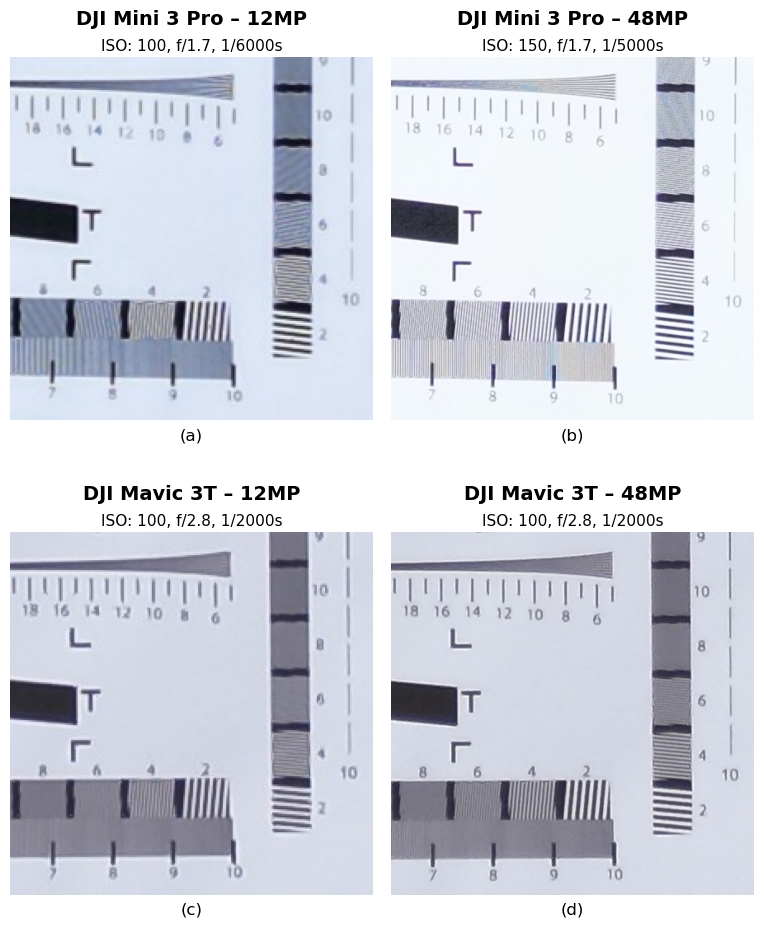

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# EINGABE Bildpfade
base_dir = "110_B_BaseData"
image_files = [
    "DJI_Mini3Pro_ISO-12233_12MP_cut.JPG",
    "DJI_Mini3Pro_ISO-12233_48MP_cut.JPG",
    "DJI_Mavic3T_ISO12233_12MP_cut.JPG",
    "DJI_Mavic3T_ISO12233_48MP_cut.JPG"
]
subfig_labels = ['(a)', '(b)', '(c)', '(d)']
manual_metadata = [
    "ISO: 100, f/1.7, 1/6000s",
    "ISO: 150, f/1.7, 1/5000s",
    "ISO: 100, f/2.8, 1/2000s",
    "ISO: 100, f/2.8, 1/2000s"
]
crop_sizes = {"12MP": 220, "48MP": 440}
image_paths = [os.path.join(base_dir, f) for f in image_files]

# === Create 2x2 figure with custom spacing ===
fig, axes = plt.subplots(2, 2, figsize=(8, 10), gridspec_kw={'hspace': 0.2, 'wspace': 0.05})

for i, (path, label) in enumerate(zip(image_paths, subfig_labels)):
    img = Image.open(path)
    width, height = img.size

    resolution = "48MP" if "48MP" in path else "12MP"
    crop_size = crop_sizes[resolution]
    center_x, center_y = width // 2, height // 2
    crop_box = (
        center_x - crop_size // 2,
        center_y - crop_size // 2,
        center_x + crop_size // 2,
        center_y + crop_size // 2
    )
    cropped = img.crop(crop_box)

    # Camera label
    if "Mini3Pro" in path:
        camera = "DJI Mini 3 Pro"
    elif "Mavic3T" in path:
        camera = "DJI Mavic 3T"
    else:
        camera = "Unknown"

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.imshow(cropped)
    ax.axis("off")

    # Titel
    ax.text(0.5, 1.08, f"{camera} – {resolution}", fontsize=14, fontweight='bold',
            ha='center', va='bottom', transform=ax.transAxes)
    ax.text(0.5, 1.01, manual_metadata[i], fontsize=11,
            ha='center', va='bottom', transform=ax.transAxes)

    # Subfigure label
    ax.text(0.5, -0.02, label, fontsize=12,
            ha='center', va='top', transform=ax.transAxes)

# Optional fine-tune layout
plt.subplots_adjust(top=0.92, bottom=0.05, left=0.05, right=0.98)
plt.show()


